# Linear Discriminant Analysis

A Análise Linear do Discriminante (LDA) é mais comumente usada como técnica de redução de dimensionalidade na etapa de pré-processamento para aplicações de classificação de padrões e de aprendizado de máquina. O objetivo é projetar um conjunto de dados em um espaço de menor dimensão com boa separabilidade de classe, afim de evitar overfitting ("maldição de dimensionalidade") e também reduzir os custos computacionais.

A abordagem geral do LDA é muito parecida com a do PCA, mas além de encontrar os eixos de componentes que maximizam o variância de nossos dados (PCA), estamos adicionalmente interessados nos eixos que maximizam a separação entre múltiplas classes (LDA).

Portanto, em poucas palavras, o objetivo do LDA é projetar o espaço de variáveis originais em um subespaço de menor dimensionalidade k (onde k ≤ n − 1), mantendo as informações discriminatórias entre as classes. Em geral, a redução de dimensionalidade não apenas ajuda a reduzir os custos computacionais para uma determinada tarefa de classificação, mas também pode ser útil para evitar o overfiting, minimizando o erro na estimativa de parâmetros. (“maldição de dimensionalidade”).

## Principal Component Analysis vs. Linear Discriminant Analysis

Tanto a Análise Linear do Discriminante (LDA) como a Análise dos Componentes Principais (PCA) são técnicas de transformação linear que são comumente usadas para redução de dimensionalidade. O PCA pode ser descrito como um algoritmo “não supervisionado”, já que “ignora” rótulos de classes e seu objetivo é encontrar as direções (os chamados componentes principais) que maximizam a variação em um conjunto de dados. Em contraste com o PCA, o LDA é “supervisionado” e calcula as direções (“discriminantes lineares”) que representarão os eixos que maximizam a separação entre múltiplas classes.

Embora possa parecer que o LDA seja superior ao PCA para uma tarefa de classificação de várias classes em que os rótulos das classe são conhecidos, isso nem sempre acontece. Por exemplo, comparações entre exatidões de classificação para reconhecimento de imagem após o uso de PCA ou LDA mostram que o PCA tende a superar o LDA se o número de amostras por classe for relativamente pequeno. Na prática, também não é incomum usar ambos LDA e PCA em combinação: por exemplo, PCA para redução de dimensionalidade seguido por um LDA.

<img src="img/lda_vs_pca.png" />

## Resumindo o LDA em 5 etapas

Abaixo estão listadas as 5 etapas gerais para realizar uma análise discriminante linear.

- Calcule os vetores de média d-dimensional para as diferentes classes do conjunto de dados.
- Calcule as matrizes de dispersão (matriz de dispersão entre classes e dentro da classe).
- Calcule os autovetores $ (e_1, e_2, ..., e_d) $ e os autovalores correspondentes $ (λ_1, λ_2, ..., λ_d)$ para as matrizes de dispersão.
- Ordene os autovetores com relação aos respectivos autovalores e escolha k autovetores com os maiores autovalores para formar uma matriz $ W $ de dimensões $ d × k $ (onde cada coluna representa um autovetor).
- Use essa matriz de autovetores $ d × k $ para transformar as instâncias no novo subespaço. Isso pode ser resumido pela multiplicação da matriz: $ Y = X × W $ (onde $ X $ é uma matriz $ n × d $ dimensional que representa as n instâncias, e $ y $ são as amostras transformadas $ n × k $ dimensionais no novo subespaço).

## Preparando a base de Dados

Para essa aula, trabalharemos com o famoso conjunto de dados "Iris" que pode ser encontrado no repositório de aprendizado de máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Iris).

O conjunto de dados da íris contém medições para 150 flores de íris de três espécies diferentes.

As três classes no conjunto de dados Iris são:

- Iris-setosa (n = 50)
- Íris-versicolor (n = 50)
- Iris-virginica (n = 50)

E as quatro variáves do conjunto de dados são:

- comprimento de sépala em cm
- largura da sépala em cm
- comprimento da pétala em cm
- largura da pétala em cm

<img src="img/iris.png" />

## Carregando a Base de Dados

Para carregar os dados da Iris diretamente do repositório da UCI, vamos usar a biblioteca de pandas.

In [1]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Como é mais conveniente trabalhar com valores numéricos, usaremos o LabelEncoder da biblioteca scikit-learn para converter os rótulos de classe em números: 1, 2 e 3.

In [3]:
from sklearn.preprocessing import LabelEncoder

X = df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']].values
y = df['class'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

# Histogramas e Seleção de Variáveis

Apenas para ter uma idéia aproximada de como as amostras de nossas três classes ω1, ω2 e ω3 são distribuídas, vamos visualizar as distribuições das quatro características diferentes em histogramas unidimensionais.

In [4]:
%matplotlib inline

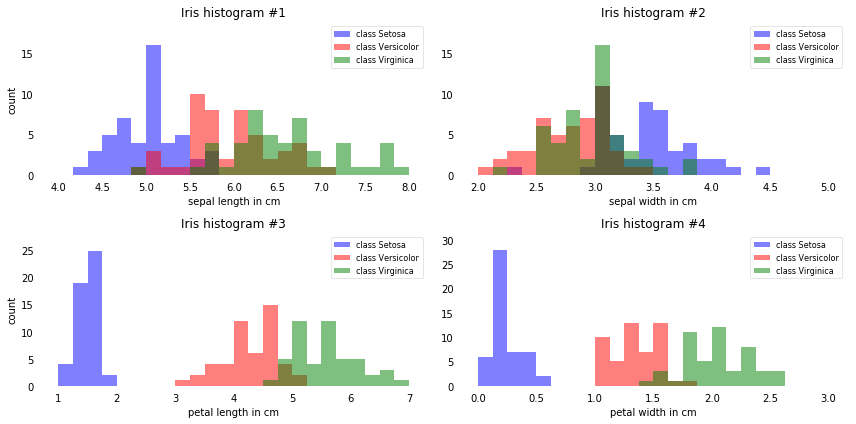

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

A partir da observação gráfica simples das variáveis, já podemos dizer que os comprimentos e larguras da pétala provavelmente são mais adequados como características potenciais, duas separadas entre as três classes de flores. Na prática, em vez de reduzir a dimensionalidade por meio de uma projeção, uma boa alternativa seria uma técnica de seleção de variáveis. Para conjuntos de dados de baixa dimensão, como Iris, uma olhada nesses histogramas já seria muito informativa.

# Pressuposição de Normalidade

Deve-se mencionar que o LDA assume dados distribuídos normalmente, variáveis que são estatisticamente independentes e matrizes de covariância idênticas para cada classe. No entanto, isso só se aplica ao LDA como classificador e o LDA para redução de dimensionalidade também funciona razoavelmente bem mesmo se essas suposições forem violadas. E mesmo para tarefas de classificação, o LDA parece ser bastante robusto para a distribuição dos dados:

“A análise linear do discriminante freqüentemente alcança bons desempenhos nas tarefas de reconhecimento de faces e objetos, mesmo que as suposições de matriz de covariância comum entre grupos e normalidade sejam frequentemente violadas (Duda, et al., 2001)” (Tao Li, et al., 2006).

## Implementado o LDA

### Etapa 1: Computando os vetores de média d-dimensional

Nesta primeira etapa, começaremos com um simples cálculo dos vetores de médias $ m_i, (i = 1,2,3) $ das 3 classes de flores diferentes:

In [8]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



### Etapa 2: Computando as Matrizes de Dispersão

Agora, vamos calcular as duas matrizes de dimensão 4x4: A matriz de dispersão entre classes e entre classes.

#### 2.1 Matrix de Dispersão Intra Classes $ S_w $

A matrix de dispersão Intra Classes $ S_w $ pode ser calculada da seguinte maneira:

$$ S_w = \sum_{i = 1}^{c} S_i $$

onde $ S_i $ pode ser calculdado como segue:

$$ S_i = \sum_{x \in D_i}^{x} (x - m_i)^{T} (x - m_i)$$

In [12]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:')
print(S_W)

within-class Scatter Matrix:
[[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


#### 2.1 Matrix de Dispersão Entre Classes $ S_B $

A matrix de dispersão Entre Classes $ S_w $ pode ser calculada da seguinte maneira:

$$ S_B = \sum_{i = 1}^{c} N_i(m_i - m)^{T} (m_i - m)$$

Onde $ m $ é a média geral da base, e $ m_i $ e $ N_i $ são a média e o tamanho das amostras das respectivas classes.

In [13]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:')
print(S_B)

between-class Scatter Matrix:
[[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


### Etapa 3: Encontrar os autovalores e autovetores para a matriz $ S_{W}^{-1}S_B$

In [14]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.2049]
 [ 0.3871]
 [-0.5465]
 [-0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.8379]
 [ 0.1696]
 [ 0.1229]
 [ 0.5041]]
Eigenvalue 3: -4.13e-15

Eigenvector 4: 
[[ 0.2   ]
 [-0.3949]
 [-0.4567]
 [ 0.7717]]
Eigenvalue 4: 1.20e-14


### Verificando o cálculo do autovetor e do autovalor

Uma verificação rápida de que o cálculo do autovetor e do autovalor está correto e satisfaz a equação:

$$ Av=λv$$

Onde: 
$$ A = S_{W}^{-1}S_B $$
$$ v = Autovetores$$
$$ λ = Autovalores$$

In [15]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


### Etapa 4: Selecionando discriminantes lineares para o novo subespaço de variáveis

#### 4.1. Classificando os autovetores em ordem decrescente dos autovalores

Lembre-se, desde a introdução, que não estamos interessados em apenas em projetar os dados em um subespaço que melhora a separabilidade de classes, mas também reduz a dimensionalidade de nosso espaço de variáveis.

No entanto, os autovetores definem apenas as direções do novo eixo, pois possuem o mesmo comprimento unitário 1.

Assim, afim de decidir que(ais) autovetor(es) queremos descartar para nosso subespaço de menor dimensão, temos que dar uma olhada nos autovalores correspondentes dos autovetores. Grosso modo, os autovetores com os menores autovalores possuem a menor informação sobre a distribuição dos dados, e esses são os que queremos eliminar.

A abordagem comum é ordenar os autovetores do mais alto para o menor autovalor correspondente e escolher os autovetores k principais.

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972981
0.27756686384004264
1.1953730364935478e-14
4.1311796919088535e-15


#### 4.2 Variância Acumulada

Agora, vamos expressar a "variância acumulada" como porcentagem:

In [17]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))


Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


#### 4.3 Escolhendo k autovetores com os maiores autovalores


In [18]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

('Matrix W:\n', array([[ 0.2049, -0.009 ],
       [ 0.3871, -0.589 ],
       [-0.5465,  0.2543],
       [-0.7138, -0.767 ]]))


### Etapa 5: Transformando as amostras no novo subespaço

Na última etapa, usamos a matriz 4 × 2 dimensional $ W $ que acabamos de calcular para transformar nossas amostras no novo subespaço através da equação

$$ Y=X×W $$

(onde $ X $ é uma matriz $ n × d $ representando as n amostras, e $ Y $ são as amostras transformadas $ n × k $ no novo subespaço).

In [19]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

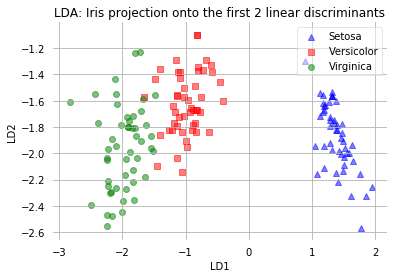

In [20]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

O gráfico de dispersão acima representa nosso novo subespaço de variáveis que nós construímos via LDA. Podemos ver que o primeiro discriminante linear "LD1" separa as classes muito bem. No entanto, o segundo discriminante, "LD2", não adiciona muita informação valiosa, que já concluímos quando analisamos os autovalores classificados no passo 4.

## LDA via scikit-learn

Agora, depois de termos visto como uma Análise Linear do Discriminante funciona usando uma abordagem passo-a-passo, há também uma maneira mais conveniente de obter o mesmo através da classe LDA implementada na biblioteca de aprendizado de máquina scikit-learn.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [22]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

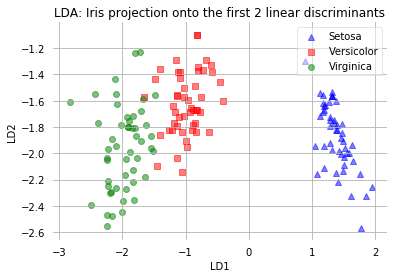

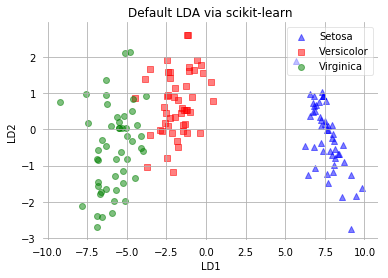

In [23]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')